<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment 3</h2>

In [1]:
# Student names and numbers:
# asper Holst Daugaard 25K4172


The assignments below should be solved and documented as a mini-project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf. You can also export as pdf directly, but here you need to watch your margins as the converter will cut off your code (i.e. make vertical code!).

In [9]:
# Import all necessary libraries here

%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import seaborn
import matplotlib.pyplot as plt

from mglearn.plots import plot_2d_separator
import mglearn

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier


# Exercise 1: Linear vs nonlinear classifiers

Below, we show a dataset that cannot be linearly separated. In this exercise, we will use the default parameters for all classifiers (except the custom SVM in exercise d).

In [10]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(1000, factor=0.0, noise=0.2)


a) Plot the dataset e.g. using the `discrete_scatter`-function from mglearn.

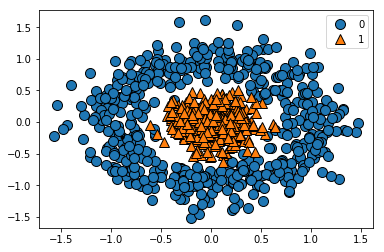

In [11]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.plot(X[0,0],X[0,1],'k.')
plt.legend()

b) Split the dataset into train and test-sets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
display(X_train)
display(X_test)
display(y_train)
display(y_test)

array([[-1.44001217, -0.04466779],
       [ 0.31202098,  0.16662056],
       [-1.47380005, -0.11475042],
       ...,
       [-0.08707465,  0.06593055],
       [-0.39049112,  0.1675812 ],
       [ 0.48384474,  0.40567117]])

array([[-9.73149455e-01,  2.05267690e-01],
       [ 1.75341985e-01, -1.02902202e-02],
       [ 1.75376596e-01,  1.59733163e-01],
       [ 1.15558576e+00,  3.20336140e-01],
       [-1.66662438e-01,  1.42946103e-01],
       [ 1.41184489e-01,  2.95653463e-01],
       [-2.90278739e-01, -1.77010387e-01],
       [-8.14367234e-01,  9.24763361e-01],
       [-3.84136414e-02, -1.53176163e-01],
       [-5.99573819e-02,  1.74678445e-01],
       [ 6.48958638e-01,  1.18809552e+00],
       [ 2.18946272e-01,  9.33250078e-03],
       [ 7.20379042e-01,  4.89354806e-01],
       [-1.64562042e-01, -1.64086613e-01],
       [ 1.01271921e+00,  7.64928489e-01],
       [ 3.96900327e-01,  1.20520433e-02],
       [ 4.95148535e-01, -1.28766168e-01],
       [ 1.05946131e-01,  9.49500973e-02],
       [ 1.00940958e+00,  3.10237267e-01],
       [ 4.56944619e-02, -3.44917375e-01],
       [-1.83103913e-01,  1.52661915e-01],
       [-5.11754719e-01, -7.44061325e-01],
       [ 1.91174361e-01,  1.03172424e-01],
       [ 7.

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

c) Train a logistic regression on the dataset, and compute the classification accuracy. 

In [13]:
Logreg = LogisticRegression().fit(X,y)

print("Accuracy on Training set is: {:.2f}".format(Logreg.score(X_train,y_train)))
print("Accuracy on Test set is: {:.2f}".format(Logreg.score(X_test,y_test)))

Accuracy on Training set is: 0.49
Accuracy on Test set is: 0.56


d) Plot the decision boundary for the logistic regression (e.g. using the `plot_2d_separator`-function from mglearn), and use this to investigate why the algorithm does not give a good result in this case.

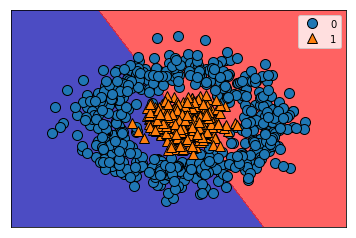

In [14]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.plot(X[0,0],X[0,1],'k.')
plt.legend()

plot_2d_separator(Logreg, X_train, fill=True, eps=0.5, alpha=.7)


e) Think of a feature you could add to this dataset to make it linearly separable. 
Add this feature, retrain the logistic regression classifier, and compute the accuracy again. Comment on the result.

Text(0.5, 0, 'feature0 ** 2')

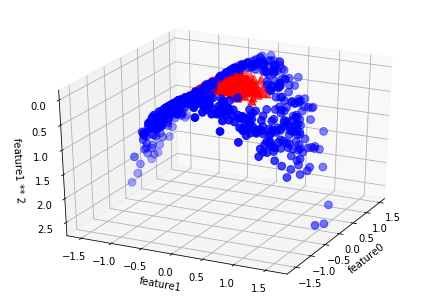

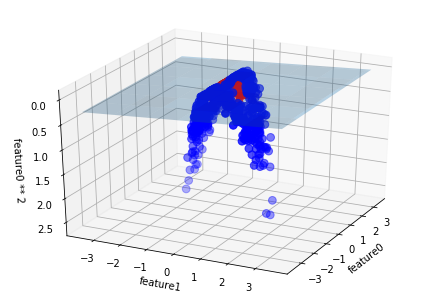

In [15]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
    cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
    cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
    cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
    cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

#Tried adding another dimension as the book, but im not sure this is very beneficial
#This was done by making the Z = x ** y



f) Now, return to the original dataset (without the extra feature), and train a kernelized SVM on the dataset. Compute the accuracy and plot the decision boundary. Compare to your previous results and discuss the differences.

Accuracy on training set: 0.99
Accuracy on test set: 0.99


Text(0, 0.5, 'Feature 1')

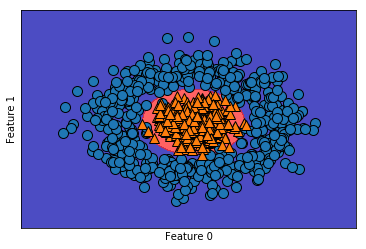

In [16]:
svm = SVC().fit(X,y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plot_2d_separator(svm, X, fill=True, eps=0.5, alpha=.7)
print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test, y_test)))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")




Accuracy on training set: 0.99
Accuracy on test set: 0.98


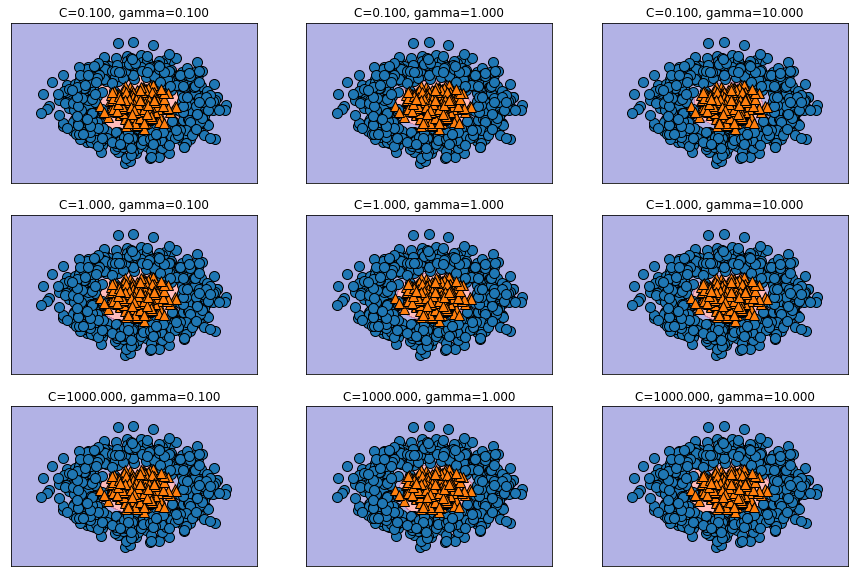

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [0.1, 1, 1000]):
    for a, gamma in zip(ax,[0.1, 1, 10]):
        svm = SVC(C=C, gamma=gamma).fit(X,y)
        mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=a)
        mglearn.plots.plot_2d_separator(svm, X, eps=.5, fill=True, alpha=0.3, ax=a)
        a.set_title("C={:.3f}, gamma={:.3f}".format(C,gamma))
        
svm.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test, y_test)))

# Exercise 2: MNIST

In this exercise, we consider the famous MNIST dataset, which is loaded below. The part of the dataset loaded as `testX` and `testY` will be reserved for testing - i.e. these cannot be used at all during training. 

It might be a good idea to only use part of the dataset (`X` and `Y`) while tuning parameters (in order to reduce the training-time).

In [5]:
import tflearn.datasets.mnist as mnist
from sklearn.model_selection import train_test_split

X, Y, testX, testY = mnist.load_data()

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


The code-snippet below can be used to see the digits corresponding to individual digits:

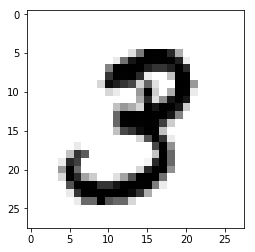

In [6]:
import matplotlib.pyplot as plt
index = 1

plt.imshow(X[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

a) Split the training data into a training and a validation set.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

C:\Users\Alien\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Binary classification

b) To begin with, in order to make things a little bit simpler (and faster!), extract from the data a binary subset, that only contains the data for two selected digits:

c) Learn different SVM models by varying the kernel function. For each configuration,
determine the time it takes to learn the model, and the accuracy on the validation data. *Caution*: for some
configurations, learning here can take a little while (several minutes).

d) Find a way to extract the misclassified test cases. Inspect some misclassified cases and display them along with their correct label.
Do they correspond to hard to recognize digits (also for the human reader)?  

e) How do results (time and accuracy) change, depending on whether you consider
an 'easy' binary task (e.g. distinguishing '1' and '0') or a more difficult one (e.g. '4' vs. '5'). This exercise
requires you to make new datasets with different values for 'digit1' and 'digit2'.

### Multiclass classification

f) [Discussion only] Explain how a binary classifier, such as an SVM, can be applied to a multiclass classification problem, such as recognizing all 10 digits in the MNIST dataset.

g) From the binary classification exercise above, identify a good configuration that gives a reasonable combination
of accuracy and runtime. Use this configuration to perform a full classification of the 10 classes in the
original dataset. Report the accuracy obtained on the test data.

# Exercise 3: Regression with random forest

For this exercise we will be using the famous nycflights dataset.

So far, we have only considered how to use SVMs and decision trees (and, by extension, random forests) for classification. However, both algorithms can also be used for regression tasks, as we will see in the exercises below.

### Preprocessing

a) Load the data as a pandas dataframe and display the first 5 rows of the dataset. Remove the columns `'carrier'`,`'tailnum'`,`'flight'`,`'origin'`, and `'dest'`.

b) Plot the distributions for all variables (hint: use the `hist` method for the dataframe). Consider if you want to transform any of the variables, i.e. using a logarithmic transformation. Explain your choices.

c) Handle any nan-values in the dataset, and normalize all relevant variables. Are there any categorical variables? If so, create dummy variables for these.

d) In the following, we are going to determine which factors cause departure time delays, and try to predict the length of these delays. However, for several departures, a *negative* delay have been reported. How do you interpret a negative delay? Consider if you want to modify the negative delays in some way. 

### Regression analysis: Predicting departure time delays

e) Extract the features and the target variable (in this case the departure time delays) from the dataframe. Split the dataset into test and train sets (technically, we ought to have done this before preprocessing. For the sake of simplicity, we do not conform to this best practice in this exercise).

f) Train a decision tree regressor for predicting departure time delays (you might want to experiment with a few different values of the hyperparameters to avoid too much overfitting). Plot the tree, and explain how decision trees can be used for regression analyses.

g) Do a regression analysis as the one above, but using a random forest instead of a single decision tree. Use a grid-search to determine a good set of hyperparameters. When you have found the best model, score your model on the test set. Comment on the result. 

h) Plot the feature importances determined by the tree. Which feature is the most important? Do you have any idea as to why? Remove any features which cannot be used to predict departure time delays in any meaningful way, and redo the analysis. Comment on your results.

### Regression analysis: Predicting arrival time delays

In the last part of the exercise, we are going to try to predict arrival time delays as a function of departure time delays - it might be of interest to know how large a delay one should expect after the plane has departed from the airport. 

i) Train a decision tree or random forest regressor and an OLS to the dataset, and see how well arrival time delay. can be predicted based on departure time delay. 

j) Plot the arrival time delays as a function of the departure time delay, and show the predictions from each of the two regressors.

k) Based on the results obtained above, make a plot that extrapolates a little bit in order to predict delays slightly larger than the largest delay found in the dataset. Which model do you think gives the most trustworthy extrapolation? 

l) Hopefully you found that it is possible to predict arrival time delays quite confidently from departure time delays. See if you can improve these predictions by including some (or all) of the other features. You are encouraged to try out several different machine learning algorithms.